# **Data Loading and Exploration.**

**1. Import necessary libraries.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
sales=pd.read_csv("sales_data.csv",encoding='latin1')

**2. Display a sample of five rows of the data frame.**

In [ ]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**3. Check the shape of the data (number of rows and columns). Check the
general information about the dataframe using the .info() method.**

In [ ]:
sales.shape

(2823, 25)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**4. Check the percentage of missing values in each column of the data
frame. Drop the missing values if there are any.**

In [ ]:
percent=(sales.isnull().sum()*100/sales.isnull().count()).sort_values(ascending=False)
percent

ADDRESSLINE2        89.302161
STATE               52.639036
TERRITORY           38.044633
POSTALCODE           2.692171
ORDERNUMBER          0.000000
CUSTOMERNAME         0.000000
CONTACTFIRSTNAME     0.000000
CONTACTLASTNAME      0.000000
COUNTRY              0.000000
CITY                 0.000000
ADDRESSLINE1         0.000000
PHONE                0.000000
PRODUCTCODE          0.000000
QUANTITYORDERED      0.000000
MSRP                 0.000000
PRODUCTLINE          0.000000
YEAR_ID              0.000000
MONTH_ID             0.000000
QTR_ID               0.000000
STATUS               0.000000
ORDERDATE            0.000000
SALES                0.000000
ORDERLINENUMBER      0.000000
PRICEEACH            0.000000
DEALSIZE             0.000000
dtype: float64

**5. Check if there are any duplicate rows.**

In [ ]:
sales.duplicated().sum()

0

**6. Write a function that will impute missing values of the columns “STATE”,
“POSTALCODE”,“TERRITORY” with its most occurring label.**

In [ ]:
modeST=sales['STATE'].mode()[0]

In [ ]:
modePC=sales['POSTALCODE'].mode()[0]

In [ ]:
modeTerri=sales['TERRITORY'].mode()[0]

In [ ]:
sales['STATE'].fillna(value=modeST,inplace=True)

In [ ]:
sales['POSTALCODE'].fillna(value=modePC,inplace=True)

In [ ]:
sales['TERRITORY'].fillna(value=modeTerri,inplace=True)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.**

In [ ]:
sales1=sales.drop(columns=['ADDRESSLINE2','ORDERDATE','PHONE'],axis=1)

In [ ]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             2823 non-null   object 
 16  POSTALCODE        2823 non-null   object 


**8. Convert the labels of the STATUS column to 0 and 1. For Shipped assign
value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In
Process’, 'Disputed') assign 0. Note we will consider everything apart from
Shipped as cancel (i.e. 0).**

In [ ]:
sales1['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [ ]:
sales1['STATUS']=sales.STATUS.map({'Shipped':1,'Disputed':0,'In Process':0,'Cancelled':0,'On Hold':0,'Resolved':0})

In [ ]:
sales1['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

**9. Assign ‘STATUS’ column into a label variable and drop it from the original
Dataframe. Convert the original dataframe to the dummy coded
data.(Hint:-use pd.get_dummies()).**

In [ ]:
sales2=pd.DataFrame(data=sales['STATUS'])

In [ ]:
sales1=sales1.drop(columns=['STATUS'])

In [ ]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   QTR_ID            2823 non-null   int64  
 6   MONTH_ID          2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   object 
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   object 
 11  CUSTOMERNAME      2823 non-null   object 
 12  ADDRESSLINE1      2823 non-null   object 
 13  CITY              2823 non-null   object 
 14  STATE             2823 non-null   object 
 15  POSTALCODE        2823 non-null   object 
 16  COUNTRY           2823 non-null   object 


In [ ]:
sales3=pd.get_dummies(sales1)
sales3.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTLINE_Classic Cars',
       ...
       'CONTACTFIRSTNAME_Veysel', 'CONTACTFIRSTNAME_Victoria',
       'CONTACTFIRSTNAME_Violeta', 'CONTACTFIRSTNAME_Wendy',
       'CONTACTFIRSTNAME_William', 'CONTACTFIRSTNAME_Wing C',
       'CONTACTFIRSTNAME_Yoshi', 'DEALSIZE_Large', 'DEALSIZE_Medium',
       'DEALSIZE_Small'],
      dtype='object', length=645)

In [ ]:
sales3.shape

(2823, 645)

**10. Use StandardScaler to scale the data.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sales_Scale=scaler.fit_transform(sales3)

In [ ]:
sales_Scale

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

# **PCA FOR VISUALIZATION**

**1. Take the help of PCA to reduce the data to 2 dimensions. Use
n_components=2.**

In [ ]:
cov_matrix = np.cov(sales_Scale.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00035436  0.06556638 -0.00293558 ...  0.03253303 -0.00786511
  -0.00707781]
 [ 0.06556638  1.00035436  0.005566   ...  0.30233777  0.28751923
  -0.42784622]
 [-0.00293558  0.005566    1.00035436 ...  0.19425996  0.56921326
  -0.66093218]
 ...
 [ 0.03253303  0.30233777  0.19425996 ...  1.00035436 -0.23807362
  -0.22141973]
 [-0.00786511  0.28751923  0.56921326 ... -0.23807362  1.00035436
  -0.89481697]
 [-0.00707781 -0.42784622 -0.66093218 ... -0.22141973 -0.89481697
   1.00035436]]


In [ ]:
pca=PCA( n_components=2)

**2. Take the first and second principal components and plot a scatter plot
with the labels.**

In [ ]:
pca.fit(sales_Scale)
pca_sales=pca.transform(sales_Scale)
pca_X

PCA(n_components=2)

In [ ]:
pca_X.explained_variance_ratio_

array([0.01558567, 0.01334867])

Text(0, 0.5, 'SECOND PRINCIPAL COMPONENT')

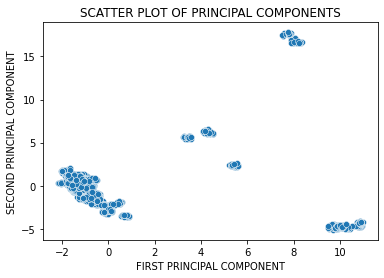

In [ ]:
sns.scatterplot(x=pca_sales[:,0],y=pca_sales[:,1])
plt.title('SCATTER PLOT OF PRINCIPAL COMPONENTS')
plt.xlabel('FIRST PRINCIPAL COMPONENT')
plt.ylabel('SECOND PRINCIPAL COMPONENT')

**3. Write the intuitions about the scatter plot.**

There is some linear relation in the components

# **PCA FOR DIMENSION REDUCTION.**

**1.Fit the PCA model on the data and plot a graph between n_components
and cumulative explained variance.**

In [ ]:
pca=PCA()
pca=pca.fit(sales_Scale)

In [ ]:
for i in pca.explained_variance_:
  var=i/sum(pca.explained_variance_)*100
  print(var)

1.5655578424870384
1.3797117974378996
1.31614833079852
1.2563831295429857
1.1971676713118797
1.178728306819973
1.1632122812830759
1.1358742129454802
1.1327772379021053
1.127846425066134
1.1197342130209087
1.1138503239860902
1.1115620709914726
1.1084962035225168
1.1030159535204789
1.1019761656066474
1.1002826099867318
1.0959339039651834
1.0900333854167832
1.0844877811197349
1.0760194508983036
1.0582930286917402
1.0546722475502244
1.035247207023098
1.0338906359905056
1.0152661298726882
1.0120332465885613
0.9992031387503766
0.9892423757294813
0.9846348983642592
0.9729280017621278
0.9687076135815008
0.9622841041730723
0.9597328423543803
0.9570664007075463
0.9560114048984368
0.9505188253492799
0.9489803664235581
0.9464511284709647
0.9454795722102796
0.9452210996135577
0.9444848103601402
0.9431888156107531
0.9430475686646268
0.9425669745738787
0.941704353218361
0.9414985238391309
0.9410007915748907
0.9402225072404778
0.939043571098189
0.9266384120868604
0.9131027228771715
0.9041318242881458


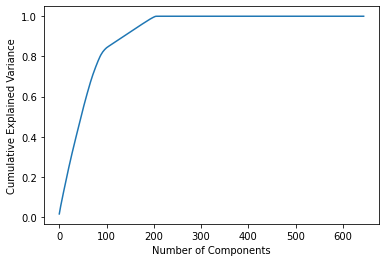

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('elbow',dpi=100)

**2. In how many components we are getting approximately 90% of explained
Variance.**

WE ARE GETTING APPROX 83%

In [ ]:
X=sales_Scale
y=sales2

# **LDA**

**1. Split the dataset into two parts (i.e. 80% train and 20% test) using
random_state=42.**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**2. Train a Linear Discriminant Analysis(LDA) model on the train data. Do
fit_transform on the train data and only transform on the test data. Use
n_components=1.**

In [ ]:
lda=LDA(n_components=1)
X_train_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**3. Train a RandomForest classifier model on the transformed train and test
data. Print the accuracy score.**

In [ ]:
RF=RandomForestClassifier(criterion='entropy',max_depth=250)
RF.fit(X_train_lda,y_train)
RF.score(X_test_lda,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8831858407079646